In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
base = pd.read_csv('/Users/alanalins/pisi3/Diabetes-PISI3/KDD/dfCleaned.csv') #alterar
base.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
1,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
2,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
3,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
4,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0


In [2]:
base.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [3]:
#dropando colunas nao normalizadas
# base = base.drop(columns=['GenHlth', 'Age', 'MentHlth',
                     # 'PhysHlth', 'Income', 'Education',
                     # 'BMI', 'Diabetes_012'])
# base.columns

In [4]:
#Separando em X e Y 
X = base.drop('DiffWalk',axis=1)
y = base.DiffWalk

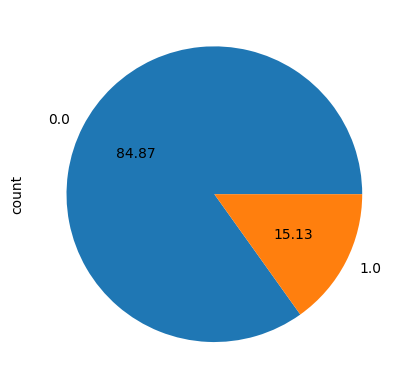

In [5]:
y.value_counts().plot.pie(autopct='%.2f');
#trocar grafico e semantica
#add labels

In [6]:
y.value_counts()

DiffWalk
0.0    200707
1.0     35777
Name: count, dtype: int64

### Dividindo entre treino e teste

In [7]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split
# Fazendo a separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42,stratify=y)
# Verificando a proporção na base de treino
(y_train.value_counts()/y_train.shape[0])*100

DiffWalk
0.0    84.870995
1.0    15.129005
Name: count, dtype: float64

In [8]:
# Treino
knn = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn.fit(X_train, y_train)

# Fazendo previsões nos dados de treino
y_pred = knn.predict(X_train)

# Avaliando o desempenho do modelo nos dados de treino
accuracy = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)


Acurácia: 0.92
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95    134473
         1.0       0.79      0.61      0.69     23971

    accuracy                           0.92    158444
   macro avg       0.86      0.79      0.82    158444
weighted avg       0.91      0.92      0.91    158444



## KNN desbalanceado

In [9]:
# # Criando o modelo KNN
# knn = KNeighborsClassifier(n_neighbors=3)

# # Treinando o modelo
# knn.fit(X_train, y_train)

# # Fazendo previsões nos dados de teste
# y_pred = knn.predict(X_train)

# # Avaliando o desempenho do modelo
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Acurácia: {accuracy:.2f}")
# print("Relatório de Classificação:")
# print(report)

A acurácia em datasets desbalanceados, em geral, é muito alta

## Arvore de classificacao

In [10]:
clfAD = DecisionTreeClassifier(random_state=0)
# Fazendo o fit com os dados
clfAD = clfAD.fit(X_train,y_train)
# Fazendo a previsão
y_predAD = clfAD.predict(X_test)
accuracy = accuracy_score(y_test, y_predAD)

# Relatório detalhado de classificação
report = classification_report(y_test, y_predAD)

# Exibindo os resultados
print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

Acurácia: 0.83
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90     66234
         1.0       0.43      0.46      0.45     11806

    accuracy                           0.83     78040
   macro avg       0.67      0.68      0.67     78040
weighted avg       0.83      0.83      0.83     78040



# Balanceado

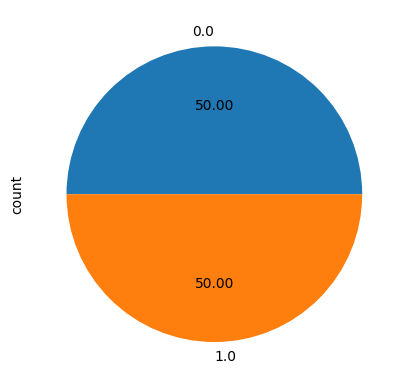

In [11]:
from imblearn.under_sampling import RandomUnderSampler
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
# Aplicando para X e y
X_res, y_res = rus.fit_resample(X_train, y_train)
# Visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

In [12]:
y_res.value_counts()

DiffWalk
0.0    23971
1.0    23971
Name: count, dtype: int64

In [13]:
# Criando o modelo KNN
knn_balanced = KNeighborsClassifier(n_neighbors=3)

# Treinando o modelo
knn_balanced.fit(X_res, y_res)

# Fazendo previsões nos dados de teste
y_pred2 = knn_balanced.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred2)
report = classification_report(y_test, y_pred2)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:")
print(report)

Acurácia: 0.82
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     66234
         1.0       0.43      0.69      0.53     11806

    accuracy                           0.82     78040
   macro avg       0.69      0.76      0.71     78040
weighted avg       0.86      0.82      0.83     78040



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criando o modelo da árvore de decisão
clfAD_balanced = DecisionTreeClassifier(random_state=0)

# Fazendo o fit com os dados balanceados
clfAD_balanced = clfAD_balanced.fit(X_res, y_res)

# Fazendo a previsão nos dados de teste
y_predAD_balanced = clfAD_balanced.predict(X_test)

# Calculando a acurácia
accuracy_balanced = accuracy_score(y_test, y_predAD_balanced)

# Relatório detalhado de classificação
report_balanced = classification_report(y_test, y_predAD_balanced)

# Exibindo os resultados
print(f"Acurácia: {accuracy_balanced:.2f}")
print("Relatório de Classificação:")
print(report_balanced)


Acurácia: 0.73
Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     66234
         1.0       0.32      0.72      0.44     11806

    accuracy                           0.73     78040
   macro avg       0.63      0.73      0.63     78040
weighted avg       0.84      0.73      0.76     78040



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Testando um modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_res, y_res)
y_pred_rf = rf.predict(X_test)

# Avaliando o desempenho
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Acurácia (Random Forest): {accuracy_rf:.2f}")
print(report_rf)


Acurácia (Random Forest): 0.80
              precision    recall  f1-score   support

         0.0       0.96      0.80      0.87     66234
         1.0       0.42      0.81      0.55     11806

    accuracy                           0.80     78040
   macro avg       0.69      0.80      0.71     78040
weighted avg       0.88      0.80      0.82     78040

